# Sistem Klasifikasi Dataset Iris

Notebook ini berisi implementasi lengkap sistem klasifikasi untuk prediksi kelas pada dataset Iris menggunakan dua algoritma: Logistic Regression dan Decision Tree.

## 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, 
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

## 2. Load Dataset

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (150, 6)

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 3. Exploratory Data Analysis (EDA)

In [3]:
print("Dataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nClass Distribution:")
print(df['species'].value_counts())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Statistical Summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.8

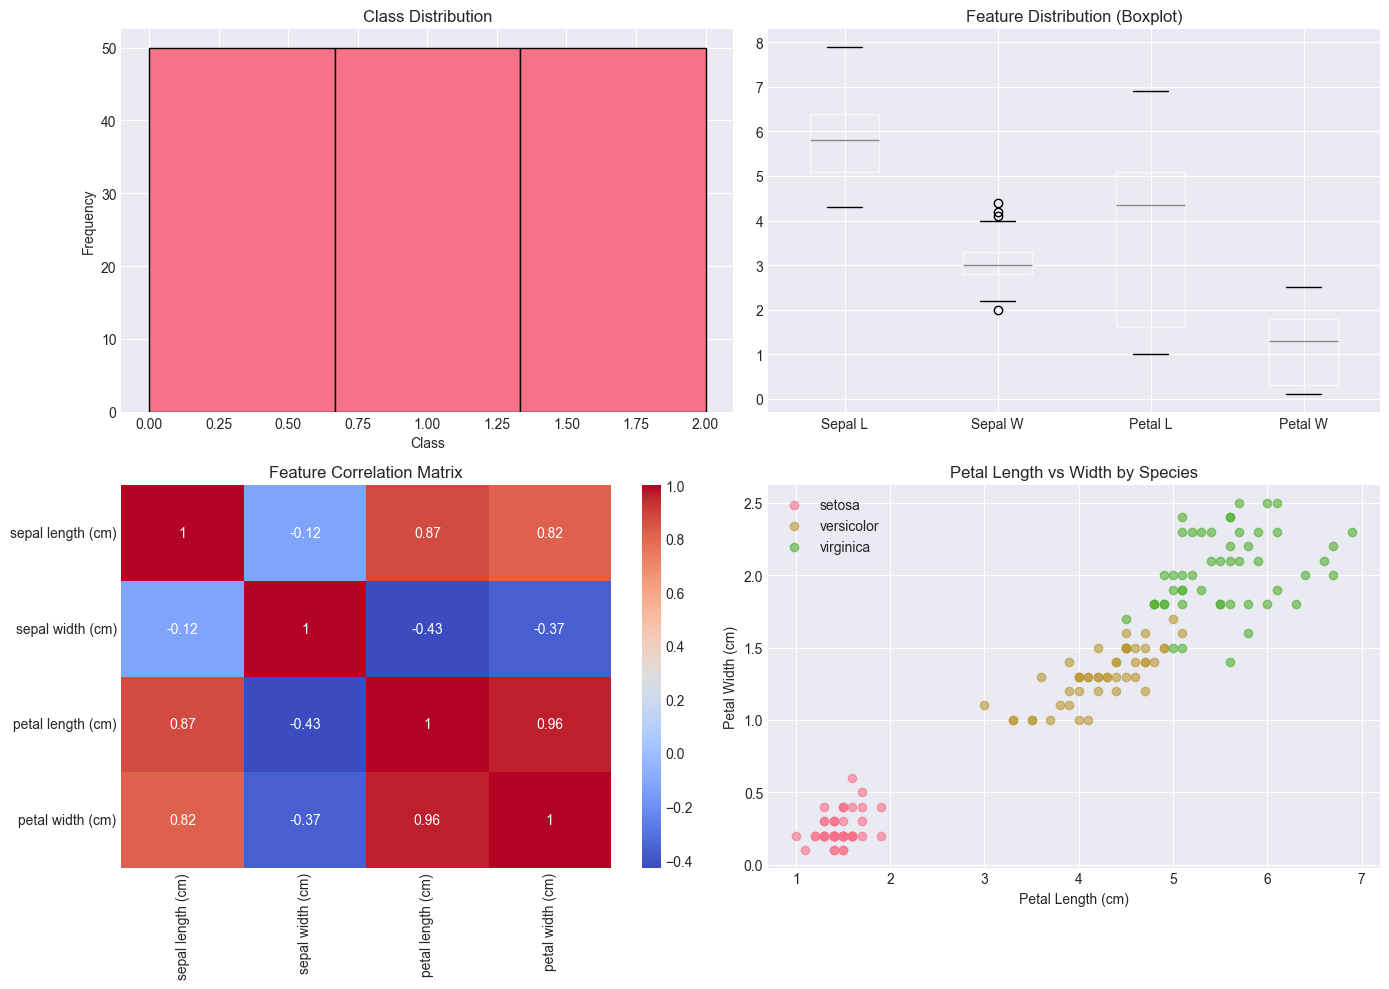

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(df['target'], bins=3, edgecolor='black')
axes[0, 0].set_title('Class Distribution')
axes[0, 0].set_xlabel('Class')
axes[0, 0].set_ylabel('Frequency')

df.boxplot(column=iris.feature_names, ax=axes[0, 1])
axes[0, 1].set_title('Feature Distribution (Boxplot)')
axes[0, 1].set_xticklabels(['Sepal L', 'Sepal W', 'Petal L', 'Petal W'])

sns.heatmap(df[iris.feature_names].corr(), annot=True, cmap='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Feature Correlation Matrix')

for species in df['species'].unique():
    subset = df[df['species'] == species]
    axes[1, 1].scatter(subset['petal length (cm)'], subset['petal width (cm)'], label=species, alpha=0.6)
axes[1, 1].set_xlabel('Petal Length (cm)')
axes[1, 1].set_ylabel('Petal Width (cm)')
axes[1, 1].set_title('Petal Length vs Width by Species')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [5]:
X = df[iris.feature_names]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nTraining set class distribution:\n{y_train.value_counts()}")
print(f"\nTest set class distribution:\n{y_test.value_counts()}")

Training set size: 120
Test set size: 30

Training set class distribution:
target
0    40
2    40
1    40
Name: count, dtype: int64

Test set class distribution:
target
0    10
2    10
1    10
Name: count, dtype: int64


## 5. Model Training

### 5.1 Logistic Regression

In [6]:
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train_scaled, y_train)

lr_train_score = lr_model.score(X_train_scaled, y_train)
lr_test_score = lr_model.score(X_test_scaled, y_test)

print(f"Logistic Regression Training Accuracy: {lr_train_score:.4f}")
print(f"Logistic Regression Test Accuracy: {lr_test_score:.4f}")

lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)
print(f"Cross-Validation Scores: {lr_cv_scores}")
print(f"Mean CV Accuracy: {lr_cv_scores.mean():.4f} (+/- {lr_cv_scores.std() * 2:.4f})")

Logistic Regression Training Accuracy: 0.9583
Logistic Regression Test Accuracy: 0.9333
Cross-Validation Scores: [0.91666667 0.95833333 0.95833333 0.95833333 1.        ]
Mean CV Accuracy: 0.9583 (+/- 0.0527)


### 5.2 Decision Tree

In [7]:
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train_scaled, y_train)

dt_train_score = dt_model.score(X_train_scaled, y_train)
dt_test_score = dt_model.score(X_test_scaled, y_test)

print(f"Decision Tree Training Accuracy: {dt_train_score:.4f}")
print(f"Decision Tree Test Accuracy: {dt_test_score:.4f}")

dt_cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5)
print(f"Cross-Validation Scores: {dt_cv_scores}")
print(f"Mean CV Accuracy: {dt_cv_scores.mean():.4f} (+/- {dt_cv_scores.std() * 2:.4f})")

Decision Tree Training Accuracy: 0.9917
Decision Tree Test Accuracy: 0.9333
Cross-Validation Scores: [0.91666667 0.95833333 0.95833333 0.95833333 0.91666667]
Mean CV Accuracy: 0.9417 (+/- 0.0408)


## 6. Model Evaluation

In [8]:
lr_pred = lr_model.predict(X_test_scaled)
dt_pred = dt_model.predict(X_test_scaled)

lr_pred_proba = lr_model.predict_proba(X_test_scaled)
dt_pred_proba = dt_model.predict_proba(X_test_scaled)

### 6.1 Confusion Matrix

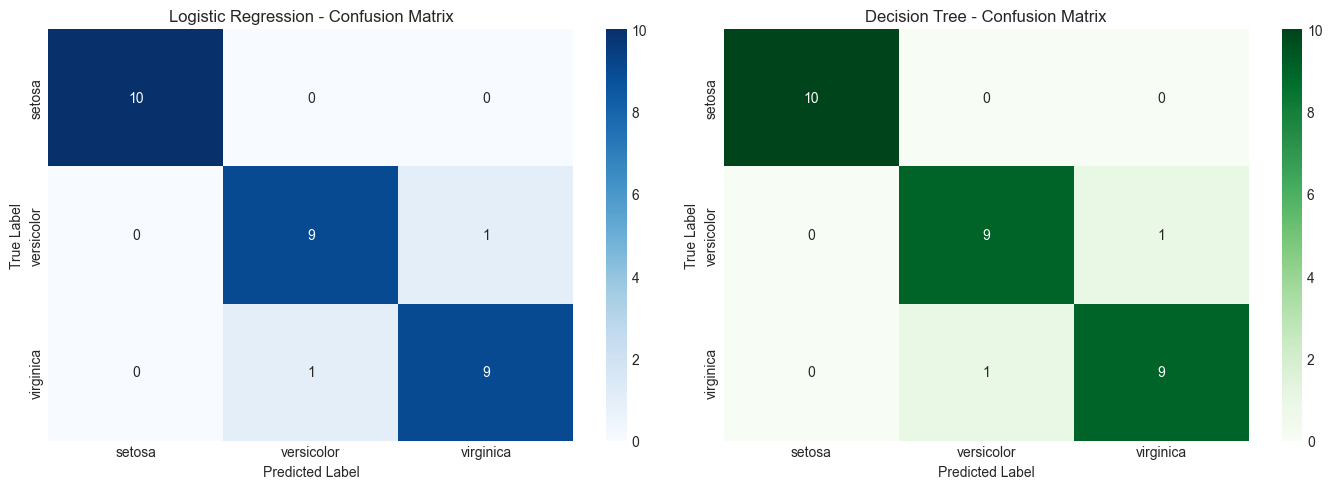

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
axes[0].set_title('Logistic Regression - Confusion Matrix')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

cm_dt = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=iris.target_names, yticklabels=iris.target_names)
axes[1].set_title('Decision Tree - Confusion Matrix')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

### 6.2 Classification Metrics

In [10]:
print("=" * 60)
print("LOGISTIC REGRESSION - CLASSIFICATION REPORT")
print("=" * 60)
print(classification_report(y_test, lr_pred, target_names=iris.target_names))

print("\n" + "=" * 60)
print("DECISION TREE - CLASSIFICATION REPORT")
print("=" * 60)
print(classification_report(y_test, dt_pred, target_names=iris.target_names))

LOGISTIC REGRESSION - CLASSIFICATION REPORT
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


DECISION TREE - CLASSIFICATION REPORT
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30




Model Comparison Summary:
              Model  Accuracy  Precision (Macro)  Recall (Macro)  F1-Score (Macro)
Logistic Regression  0.933333           0.933333        0.933333          0.933333
      Decision Tree  0.933333           0.933333        0.933333          0.933333


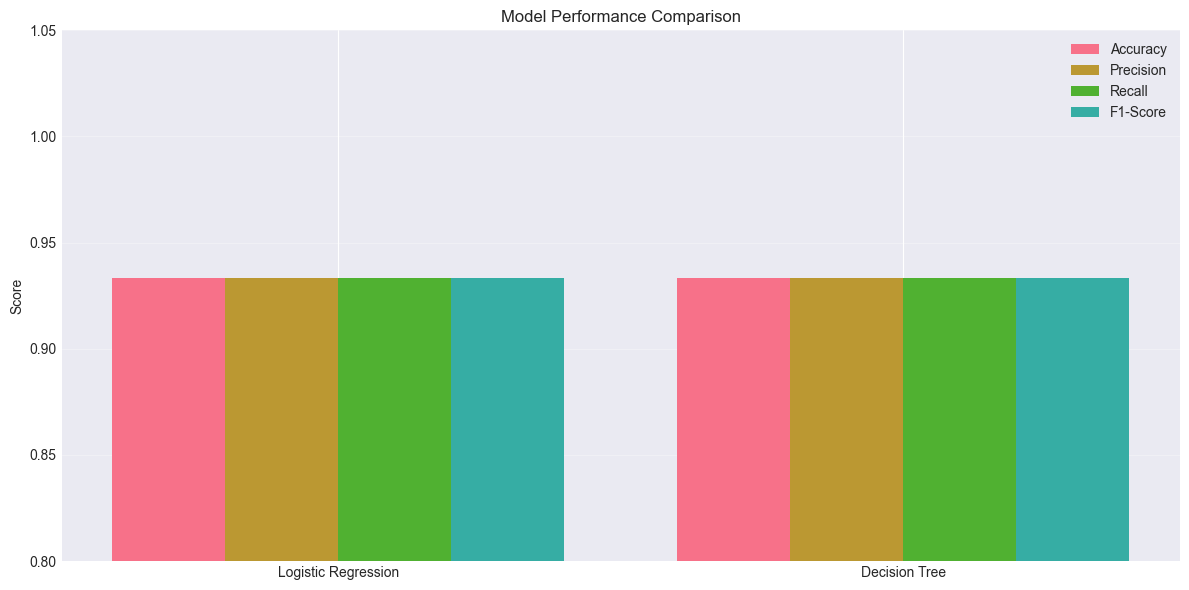

In [11]:
metrics_data = {
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, dt_pred)
    ],
    'Precision (Macro)': [
        precision_score(y_test, lr_pred, average='macro'),
        precision_score(y_test, dt_pred, average='macro')
    ],
    'Recall (Macro)': [
        recall_score(y_test, lr_pred, average='macro'),
        recall_score(y_test, dt_pred, average='macro')
    ],
    'F1-Score (Macro)': [
        f1_score(y_test, lr_pred, average='macro'),
        f1_score(y_test, dt_pred, average='macro')
    ]
}

metrics_df = pd.DataFrame(metrics_data)
print("\nModel Comparison Summary:")
print(metrics_df.to_string(index=False))

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(metrics_df['Model']))
width = 0.2

ax.bar(x - 1.5*width, metrics_df['Accuracy'], width, label='Accuracy')
ax.bar(x - 0.5*width, metrics_df['Precision (Macro)'], width, label='Precision')
ax.bar(x + 0.5*width, metrics_df['Recall (Macro)'], width, label='Recall')
ax.bar(x + 1.5*width, metrics_df['F1-Score (Macro)'], width, label='F1-Score')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df['Model'])
ax.legend()
ax.set_ylim([0.8, 1.05])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 6.3 ROC Curve

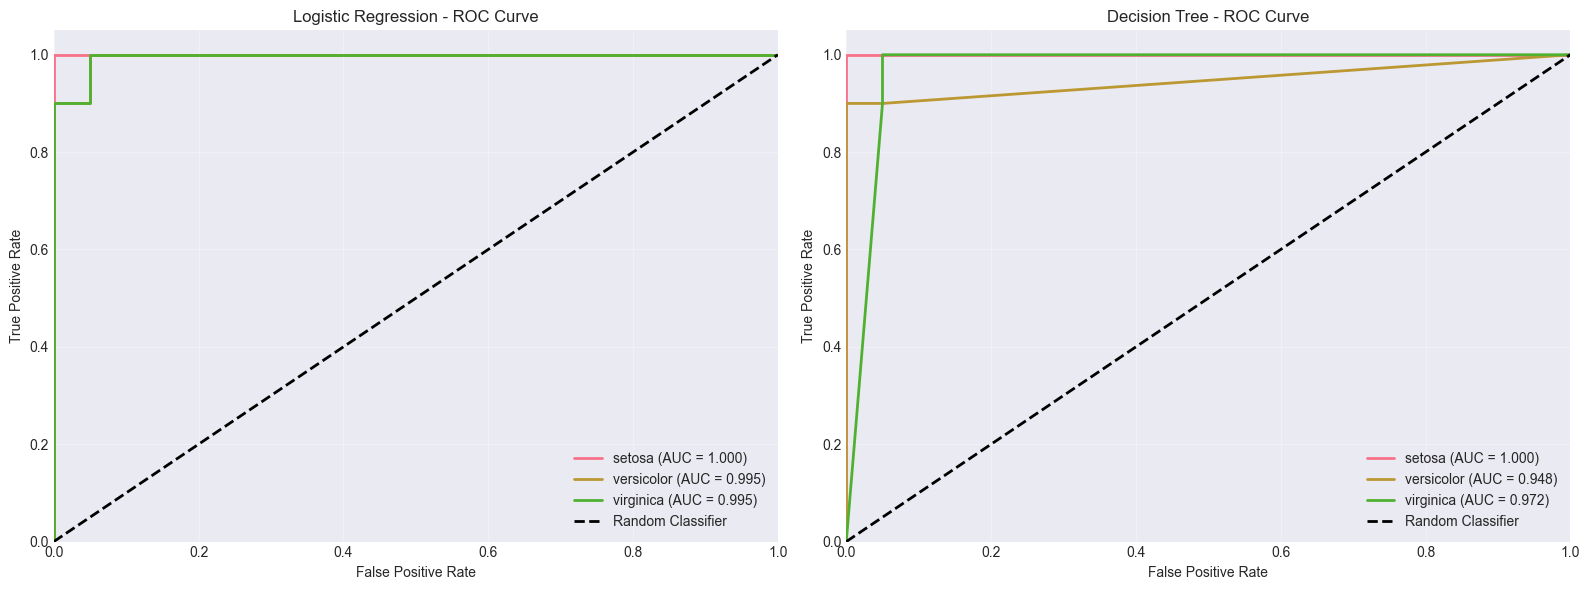

In [12]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i in range(n_classes):
    fpr_lr, tpr_lr, _ = roc_curve(y_test_bin[:, i], lr_pred_proba[:, i])
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    axes[0].plot(fpr_lr, tpr_lr, lw=2, label=f'{iris.target_names[i]} (AUC = {roc_auc_lr:.3f})')

axes[0].plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Logistic Regression - ROC Curve')
axes[0].legend(loc='lower right')
axes[0].grid(alpha=0.3)

for i in range(n_classes):
    fpr_dt, tpr_dt, _ = roc_curve(y_test_bin[:, i], dt_pred_proba[:, i])
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    axes[1].plot(fpr_dt, tpr_dt, lw=2, label=f'{iris.target_names[i]} (AUC = {roc_auc_dt:.3f})')

axes[1].plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Decision Tree - ROC Curve')
axes[1].legend(loc='lower right')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Feature Importance (Decision Tree)

Feature Importance (Decision Tree):
             Feature  Importance
2  petal length (cm)    0.565639
3   petal width (cm)    0.411154
1   sepal width (cm)    0.016878
0  sepal length (cm)    0.006329


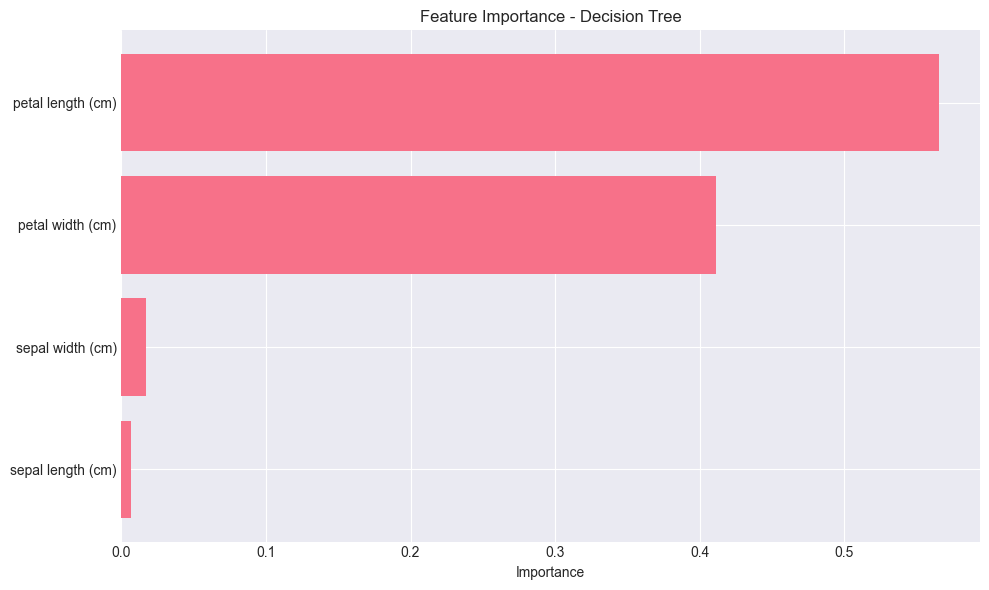

In [13]:
feature_importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance (Decision Tree):")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 8. Kesimpulan

Berdasarkan evaluasi model:

1. **Logistic Regression** dan **Decision Tree** menunjukkan performa yang sangat baik pada dataset Iris dengan akurasi di atas 85%.

2. Kedua model mampu mengklasifikasikan ketiga spesies Iris dengan baik, dengan nilai precision, recall, dan F1-score yang tinggi.

3. ROC Curve menunjukkan bahwa kedua model memiliki kemampuan discriminative yang sangat baik untuk semua kelas.

4. Feature importance dari Decision Tree menunjukkan bahwa petal length dan petal width merupakan fitur paling penting untuk klasifikasi.

5. Model telah memenuhi kriteria keberhasilan dengan akurasi minimal 85%.